In [66]:
import matplotlib.pyplot as plt
import re
import numpy as np
import os

In [78]:


target_model = "20x5x5.0+mix+free"


# 解析文件内容
def parse_content(directory_path, target_model):
    file = open(f"{directory_path}/{target_model}/makespan.txt", "r")
    lines = file.readlines()
    model_list = []
    makespans_data = []
    makespan_data = []
    for line in lines:
        # print(line)
        if line.startswith('./trained_network'):
            if makespan_data: makespans_data.append(np.array(makespan_data))
            makespan_data = []
            model_list.append(line)

        elif line.startswith('['):
            makespans = eval(line)
            makespan_data.append(makespans)

    makespans_data.append(np.array(makespan_data))
    
    model_list = [s.split("/")[-1] for s in model_list]        
    
    return model_list, makespans_data

model_list, makespan_data = parse_content("../train_log/SD2/", target_model)
# print(makespan_data)

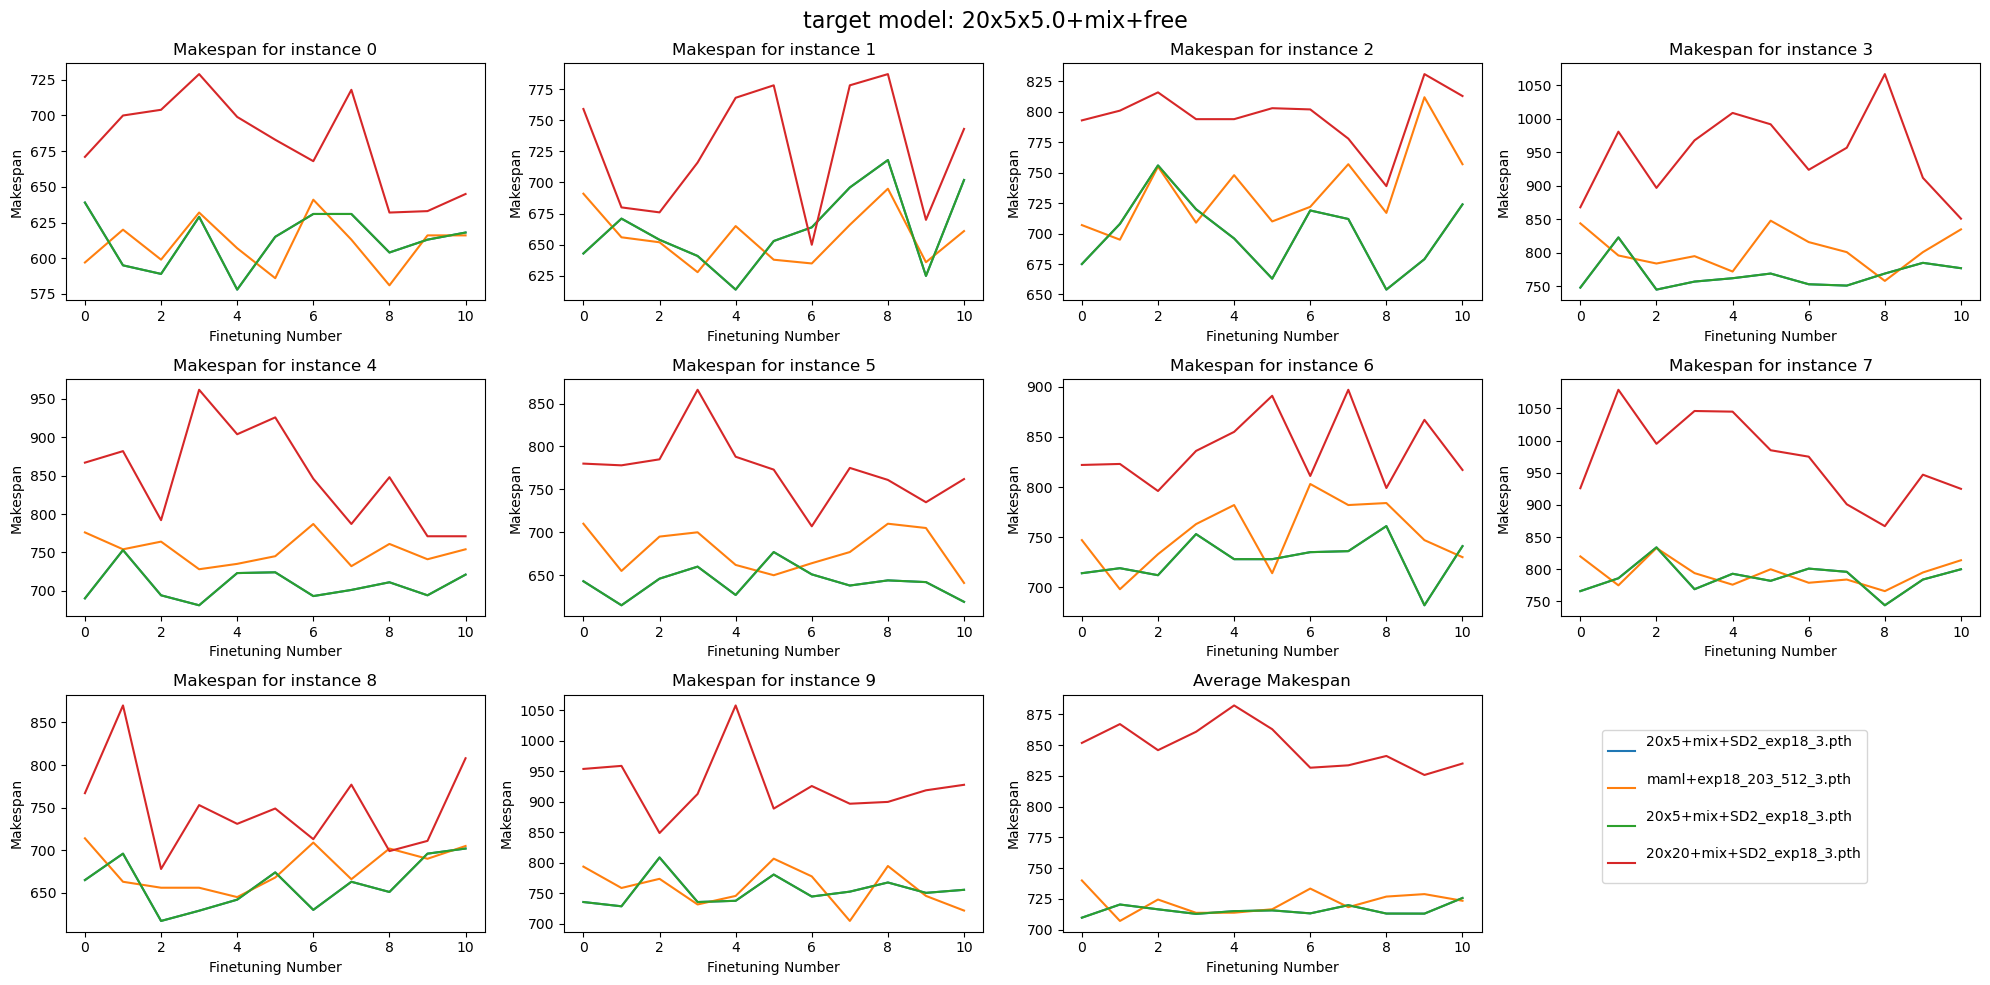

In [79]:

def plot_makespan(model_list, makespan_data, target_model):
    # 假设 makespan_data 是一个已经存在的数据结构
    # model_list 是一个包含模型名称的列表
    num_plots = 10  # 假设有20个图
    num_cols = 4  # 一行放4个图
    num_rows = num_plots // num_cols + (num_plots % num_cols > 0)

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(5*num_cols, 3*num_rows + 1))
    lines = []

    if num_plots % num_cols > 0:
        # 增加空子图，使得 axes 为完全的二维数组
        axes = np.array(axes).reshape(num_rows, num_cols)

    for i in range(num_plots):
        ax = axes[i // num_cols, i % num_cols]  # 定位当前子图    
        for j in range(len(model_list)):
            line, = ax.plot(makespan_data[j][:, i], label=f'{model_list[j]}')
            if i == 0:
                lines.append(line)
        ax.set_title(f'Makespan for instance {i}')
        ax.set_xlabel('Finetuning Number')
        ax.set_ylabel('Makespan')
        # ax.legend()

    # 计算均值并绘制均值图
    ax = axes[num_plots // num_cols, num_plots % num_cols]
    means = [np.mean(makespan_data[j], axis=1) for j in range(len(model_list))]
    for j in range(len(model_list)):
        ax.plot(means[j], label=f'{model_list[j]}')
    ax.set_title('Average Makespan')
    ax.set_xlabel('Finetuning Number')
    ax.set_ylabel('Makespan')

    for i in range(num_plots + 1, num_rows * num_cols):
        fig.delaxes(axes[i // num_cols, i % num_cols])
    # 在图形外部放置一个统一的图例
    # fig.legend(lines, [f'{model_list[j]}' for j in range(2)], loc='lower left', bbox_to_anchor=(0.5, -0.05), ncol=2)

    # 在图形外部放置一个统一的图例
    fig.legend(lines, [f'{model_list[j]}' for j in range(len(model_list))], loc='lower left', bbox_to_anchor=(0.8, 0.1), ncol=1)
    fig.suptitle(f"target model: {target_model}" , fontsize=16)
    # plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # 为图例预留空间
    # plt.show()

    # plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # 为图例预留空间
    plt.tight_layout()
    plt.show()

model_list, makespan_data = parse_content("../train_log/SD2/", target_model)
plot_makespan(model_list, makespan_data, target_model) 


In [82]:

def plot_dirs(directory_path):
    
    target_list = [name for name in os.listdir(directory_path) if os.path.isdir(os.path.join(directory_path, name))]
    print(target_list)
    for target_model in target_list:
        model_list, makespan_data = parse_content(directory_path, target_model)
        plot_makespan(model_list, makespan_data, target_model)

directory_path = "../train_log/SD2"
# plot_dirs(directory_path)

['17x10x5+mix+free', '10x10x5+mix+free', '15x10x5+mix+free', '5x10x5+mix+free', '7x10x5+mix+free', '13x10x5+mix+free', '25x10x5+mix+free', '20x10x5+mix+free', '23x10x5+mix+free']


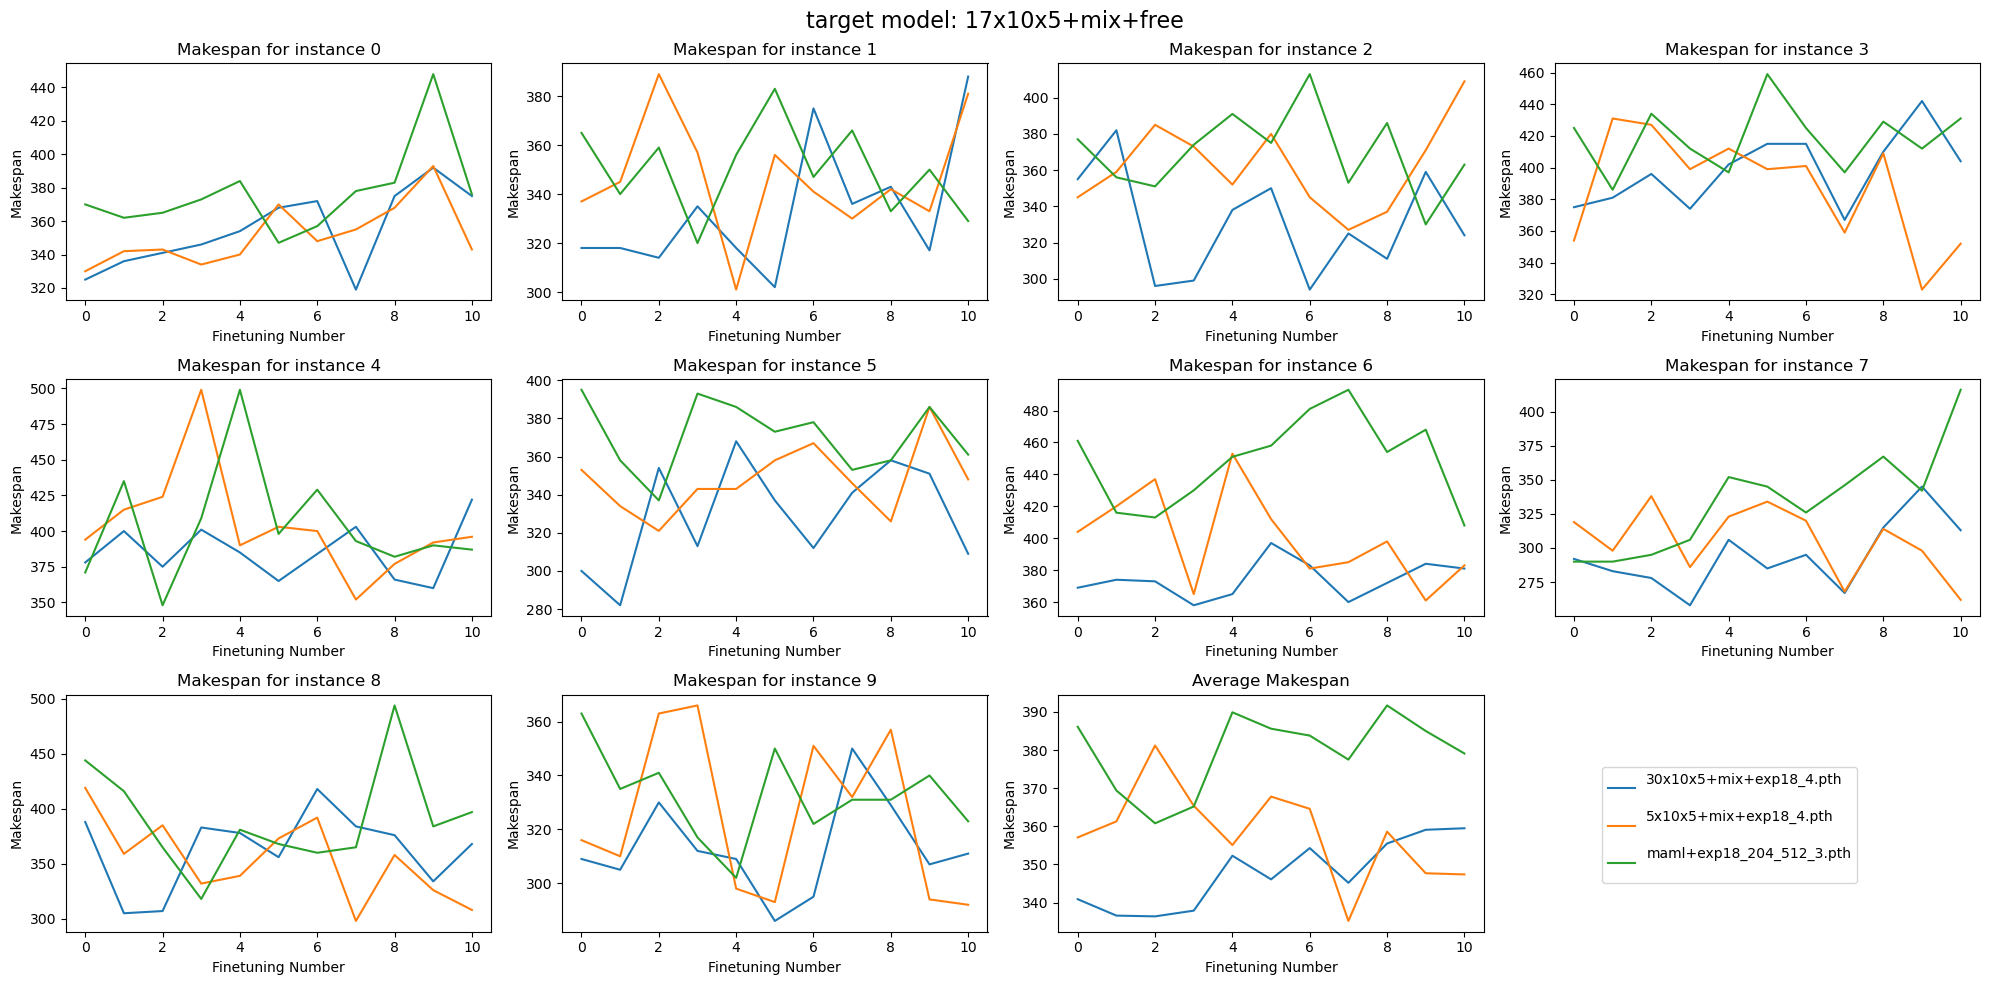

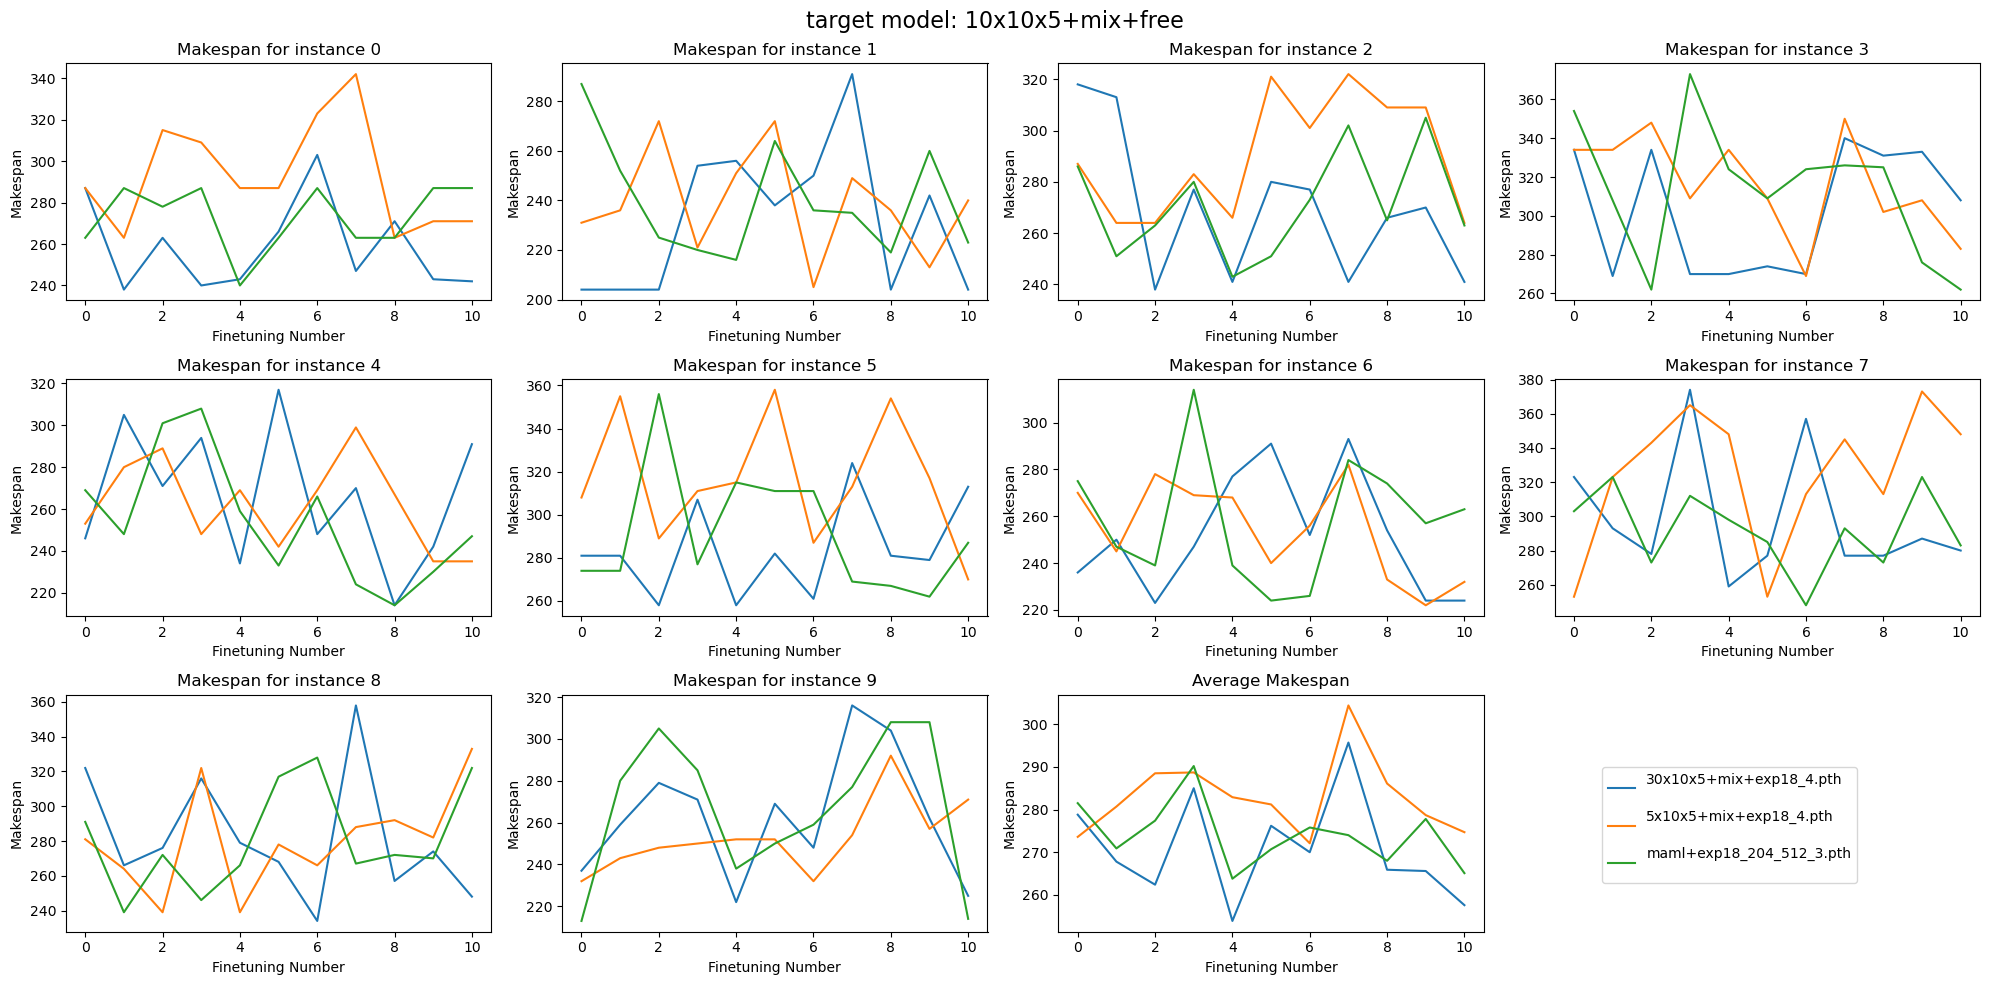

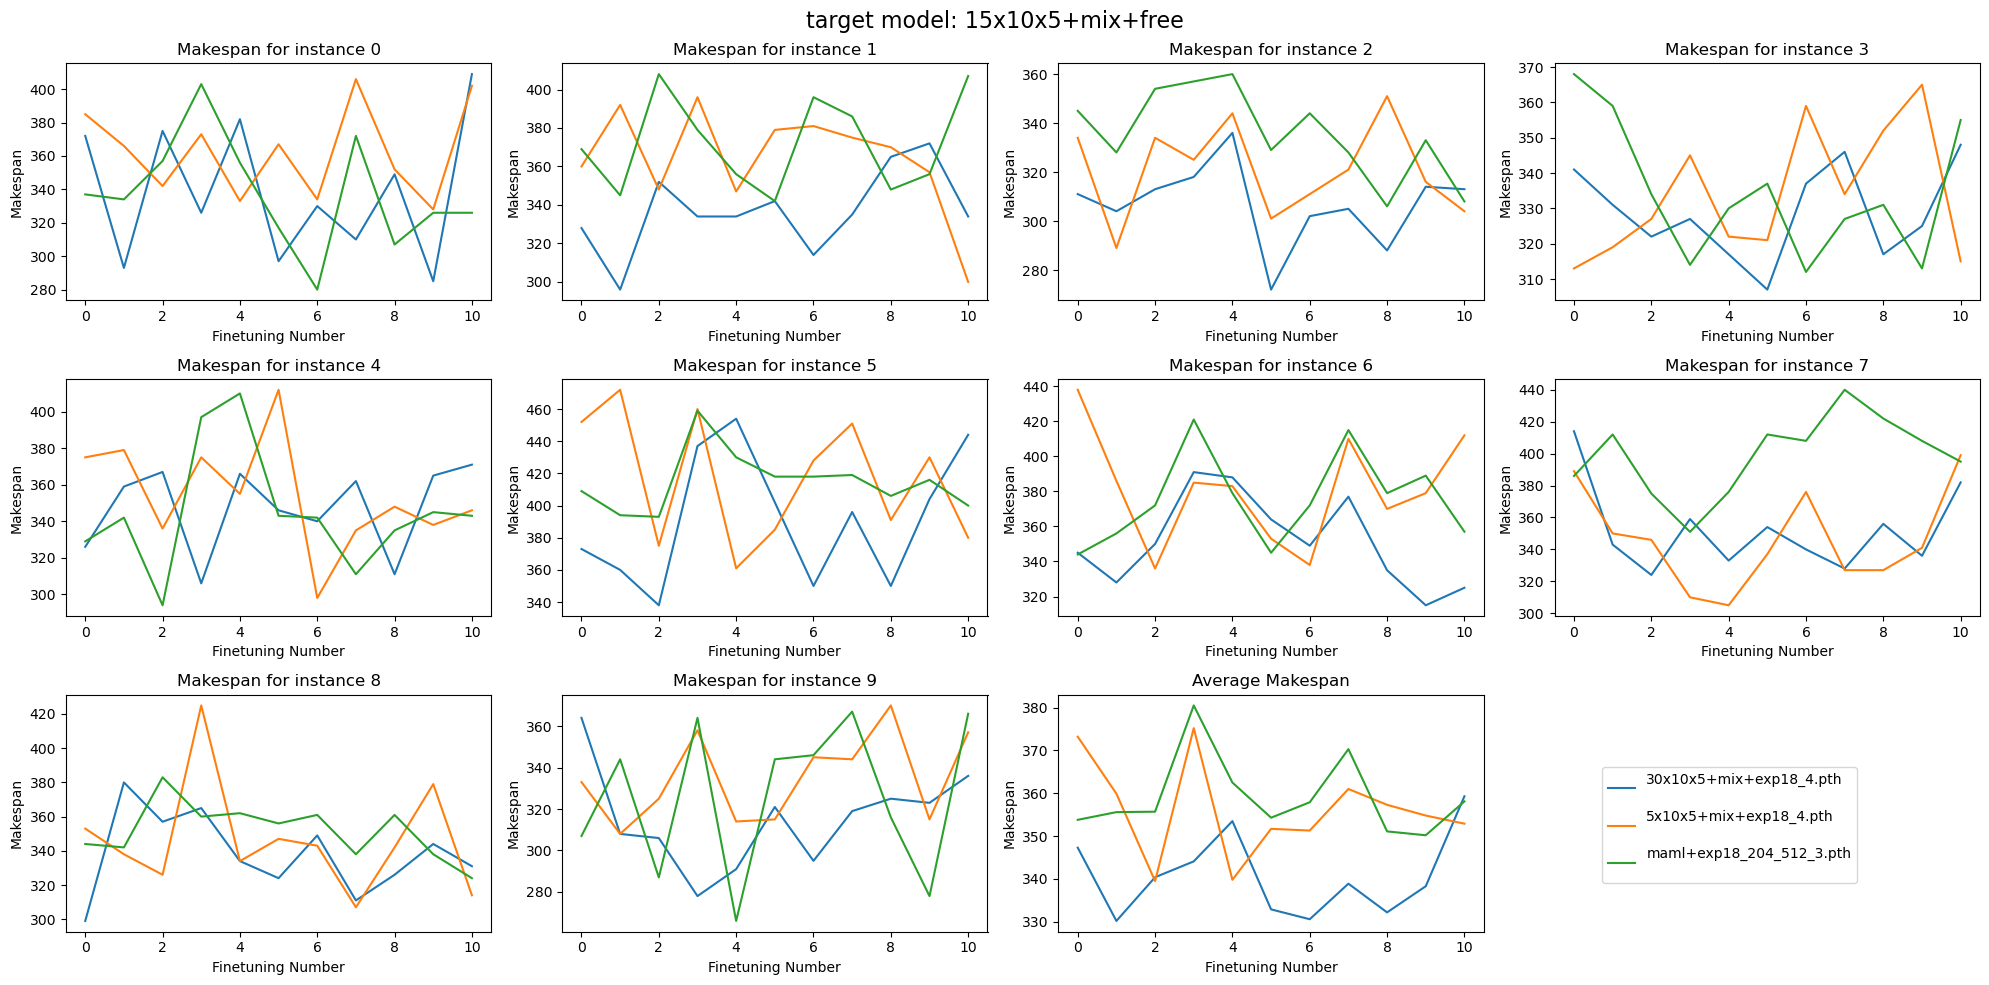

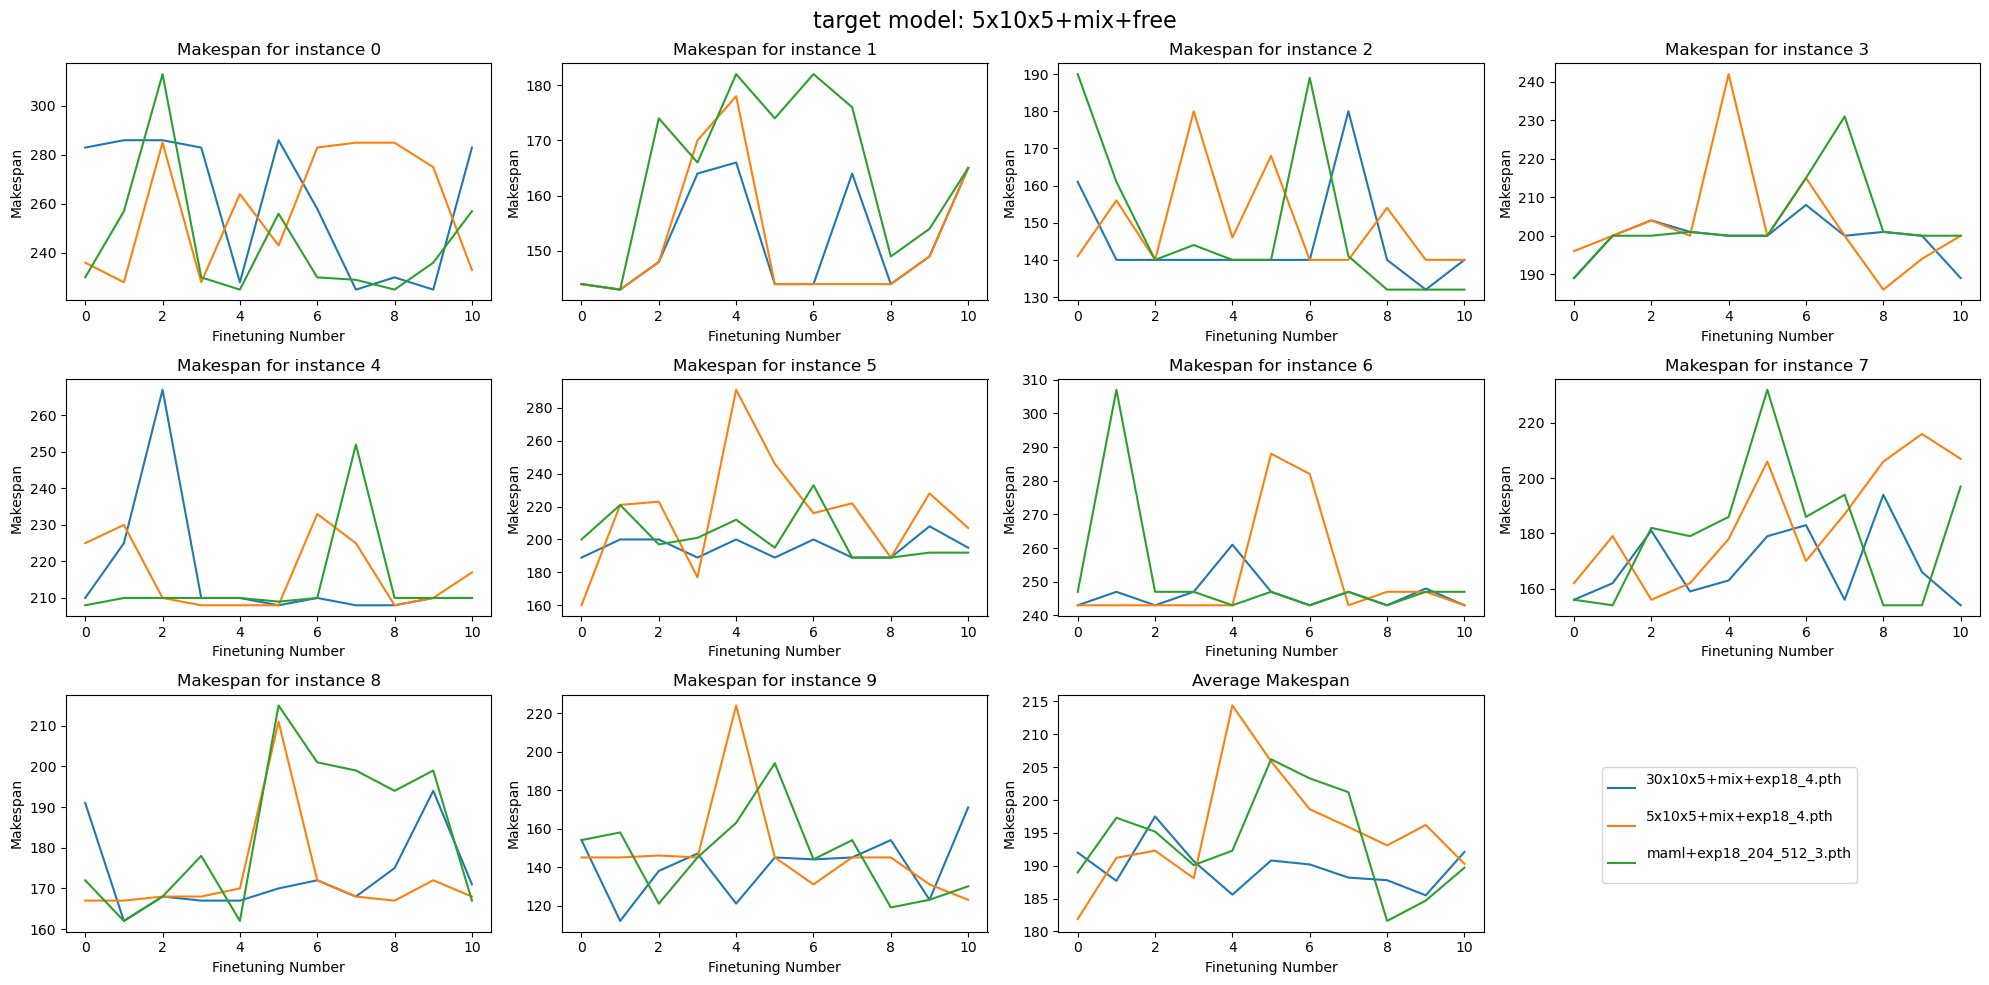

KeyboardInterrupt: 

In [83]:
for exp_dim in ['j', 'm', 'op']:
    print(exp_dim*50)
    directory_path = f"../train_log/SD2/{exp_dim}"
    plot_dirs(directory_path)
